In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

SEED = 42
np.random.seed(SEED)

pd.set_option("display.max_columns", 10)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [60]:
import zipfile
import urllib.request
from pathlib import Path

#Constantes y rutas
URL= "https://www.kaggle.com/api/v1/datasets/download/hmavrodiev/london-bike-sharing-dataset"
ZIP = "archive.zip"
CSV = "london_merged.csv"

def cargar_datos(ruta: str | Path = "dataset") -> pd.DataFrame:
  # Descargar, extraer y validar el dataset de bicicletas de Londres
  ruta = Path(ruta)
  ruta_zip = ruta / ZIP
  ruta_csv = ruta / CSV

  # Crear la ruta si no existe
  if not ruta.exists():
    ruta.mkdir(parents=True, exist_ok=True)

  # Descargar si no existe
  if not ruta_zip.is_file():
    print(f"Descargando dataset")

    try:
      opener = urllib.request.build_opener()
      urllib.request.install_opener(opener)

      urllib.request.urlretrieve(URL, ruta_zip)
      print("Descarga completada")
    except Exception as e:
      print(f"Error al descargar el dataset: {e}")
      return None
  else:
    print("Archivo detectado. Omitiendo descarga")

  if not ruta_csv.is_file():
    print(f"Extrayendo ZIP")

    try:
      with zipfile.ZipFile(ruta_zip, "r") as zip_ref:
        if CSV in zip_ref.namelist():
          zip_ref.extract(CSV, ruta)
          print(f"Archivo {CSV} extraido")
        else:
          print(f"Archivo {CSV} no encontrado")
          return None
    except zipfile.BadZipFile:
      print(f"Error al extraer el ZIP")
      return None

  # Cargar el dataset y verificar la estructura
  df = pd.read_csv(ruta_csv)
  #Validaciones
  assert isinstance(df, pd.DataFrame)
  assert not df.empty
  print(f"Datos cargados exitosamente:", df.shape)
  return df



df_bikes = cargar_datos()
df_bikes.head()


Archivo detectado. Omitiendo descarga
Datos cargados exitosamente: (17414, 10)


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


## EDA

In [61]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [62]:
df_bikes.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [63]:
df_bikes["season"].value_counts()

,count
season,
0.0,4394
1.0,4387
3.0,4330
2.0,4303


In [64]:
df_bikes["weather_code"].value_counts()

,count
weather_code,
1.0,6150
2.0,4034
3.0,3551
7.0,2141
4.0,1464
26.0,60
10.0,14


In [65]:
df_bikes["is_holiday"].value_counts()

,count
is_holiday,
0.0,17030
1.0,384


In [66]:
# Tratamiento de la variable timestamp
df_bikes['timestamp'] = pd.to_datetime(df_bikes['timestamp'])

df_bikes['hour'] = df_bikes['timestamp'].dt.hour
df_bikes['day_of_week'] = df_bikes['timestamp'].dt.dayofweek
df_bikes['month'] = df_bikes['timestamp'].dt.month

In [67]:
# Creacion de un Target para Clasificacion (High_Demand)
umbral_p90 = df_bikes['cnt'].quantile(0.90)
df_bikes['High_Demand'] = (df_bikes['cnt'] > umbral_p90).astype(int)

(14.5, -0.5)

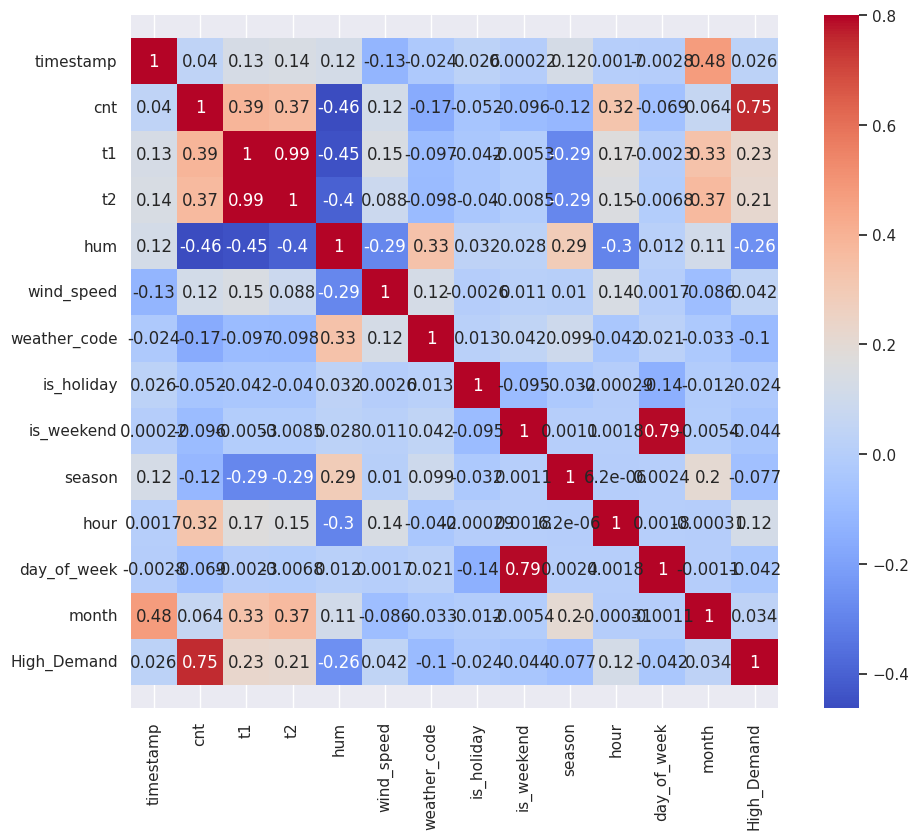

In [68]:
sns.set_style("darkgrid")
corrmat = df_bikes.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap="coolwarm");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

La matriz de correlacion nos permite ver la fuerte correlación negativa con la humedad (-0.46), lo que indica que el incremento de la humedad es factor que afecta el uso del transporte. La temperatura (t1 con 0.39) y la hora del día (hour con 0.32) muestran una relación positiva, confirmando que el clima y los ciclos horarios naturales influyen en el transporte.

Existe alta correlación entre la temperatura real (t1) y la sensación térmica (t2), con un coeficiente de 0.99, para esto se utilizará Regresión Lasso.

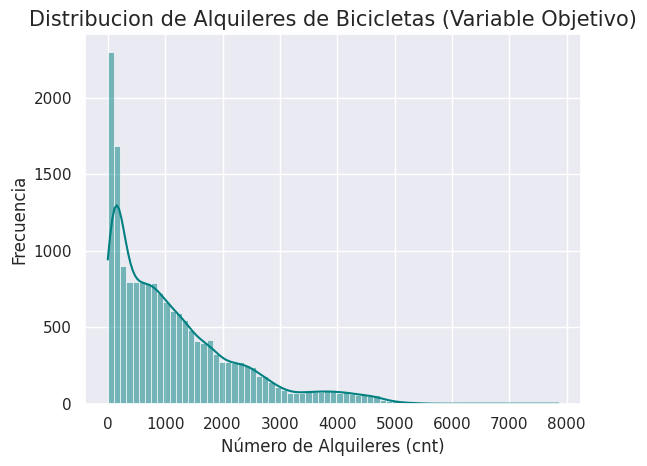

In [69]:
sns.histplot(df_bikes['cnt'], kde=True, color='teal')

plt.title('Distribucion de Alquileres de Bicicletas (Variable Objetivo)', fontsize=15)
plt.xlabel('Número de Alquileres (cnt)')
plt.ylabel('Frecuencia')
plt.show()

El histograma de la variable target muestra una distribución con cola hacia la derecha. La mayor frecuencia de datos se concentra en rangos de demanda baja a moderada.

La mayoría del tiempo el sistema opera bajo una carga predecible. Esta observación nos permite definir el umbral de High_Demand en el percentil 85 a 90.

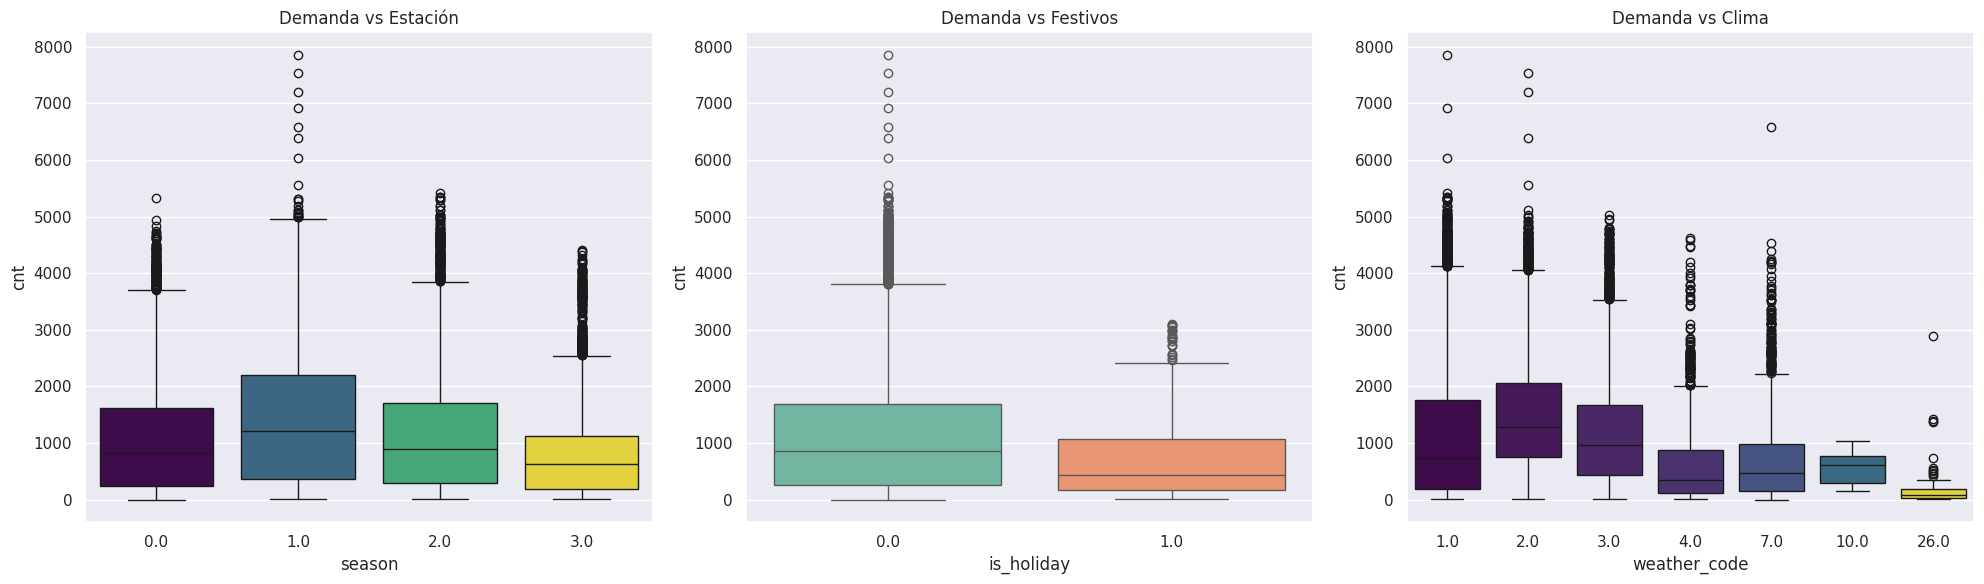

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

#Demanda por Estacióon
sns.boxplot(x='season', y='cnt', data=df_bikes, ax=axes[0], palette='viridis', hue='season', legend=False)
axes[0].set_title('Demanda vs Estación')

#Demanda en dias festivos
sns.boxplot(x='is_holiday', y='cnt', data=df_bikes, ax=axes[1], palette='Set2', hue='is_holiday',legend=False)
axes[1].set_title('Demanda vs Festivos')

#Demanda por clima
sns.boxplot(x='weather_code', y='cnt', data=df_bikes, ax=axes[2], palette='viridis', hue='weather_code',legend=False)
axes[2].set_title('Demanda vs Clima')

plt.tight_layout()
plt.show()

Los gráficos boxplot revelan comportamiento de la demanda a traves de distintas categorías:
- Demanda vs Estacion (season): Se observa una disparidad evidente en los niveles de consumo entre el verano (1.0) y el invierno (3.0). La diferencia nos indica que podemos hacer la estratificación del conjunto de datos por estacion
- Demanda vs Festivos (is_holiday): La demanda es superior en dias laborables (0.0). Inferimos que el sistema de bicicletas en Londres funciona principalmente para la productividad urbana y no como una actividad recreativa de días feriados.
- Demanda vs Clima (weather_code): El grafico confirma que climas despejados concentran gran parte de la operación. Pero ante la presencia de nieve (26.0), la demanda cae mucho.

In [71]:
from sklearn.model_selection import StratifiedShuffleSplit

#Definicion de variables
X = df_bikes.drop(columns=['cnt', 'High_Demand', 'timestamp'])
y_reg = df_bikes['cnt']
y_clf = df_bikes['High_Demand']

#Estratifica por temporada
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df_bikes, df_bikes['season']):
    train_set = df_bikes.loc[train_index]
    test_set = df_bikes.loc[test_index]

#Separacion de variables
X_train = train_set.drop(columns=['cnt', 'High_Demand', 'timestamp'])
y_train_reg = train_set['cnt']
y_train_clf = train_set['High_Demand']

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

#Variables numericas
cols_num = ['t1', 't2', 'hum', 'wind_speed']

#Variables categoricas
cols_cat = ['weather_code', 'is_holiday', 'is_weekend', 'season', 'hour', 'day_of_week', 'month']

# Imputacion de nulos por mediana y escalado estandar
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocesador = ColumnTransformer(
    transformers=[
        ('num', num_transformer, cols_num),
        ('cat', cat_transformer, cols_cat)
    ]
)

#Preprocesamiento al conjunto de entrenamiento
X_train_prep = preprocesador.fit_transform(X_train)

print(f"Dimensiones de la matriz procesada: {X_train_prep.shape}")

Dimensiones de la matriz procesada: (13931, 62)


In [73]:
#PREPARACION DE DATOS DE PRUEBA

#Separacion de variables predictoras y objetivo
X_test = test_set.drop(columns=['cnt', 'High_Demand', 'timestamp'])
y_test_reg = test_set['cnt']
y_test_clf = test_set['High_Demand']

X_test_prep = preprocesador.transform(X_test)

feature_names = preprocesador.get_feature_names_out()
print(f"Dimensiones de la matriz de prueba procesada: {X_test_prep.shape}")

Dimensiones de la matriz de prueba procesada: (3483, 62)


In [74]:
#MODELADO DE REGRESION: LINEAL VS LASSO

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np # Import numpy for sqrt function

#REGRESION LINEA;
lin_reg = LinearRegression()
lin_reg.fit(X_train_prep, y_train_reg)
y_pred_lin = lin_reg.predict(X_test_prep)

mse_lin = mean_squared_error(y_test_reg, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
mae_lin = mean_absolute_error(y_test_reg, y_pred_lin)

#REGRESION LASSO
# alpha (fuerza de la penalizacion) alpha=1.0 Default
lasso_reg = Lasso(alpha=2.0, random_state=SEED, max_iter=10000)
lasso_reg.fit(X_train_prep, y_train_reg)
y_pred_lasso = lasso_reg.predict(X_test_prep)

mse_lasso = mean_squared_error(y_test_reg, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test_reg, y_pred_lasso)

#REPORTE METRICAS
print("METRICAS REGRESION")
print(f"Regresión Lineal -> RMSE: {rmse_lin:.2f} | MAE: {mae_lin:.2f}")
print(f"Regresión Lasso  -> RMSE: {rmse_lasso:.2f} | MAE: {mae_lasso:.2f}")

#COMPARACION COEFICIENTES
coef_df = pd.DataFrame({
    'Variable': feature_names,
    'Coef_Lineal': lin_reg.coef_,
    'Coef_Lasso': lasso_reg.coef_
})

print("\nCOMPARACIÓN DE COEFICIENTES")
print(coef_df[coef_df['Variable'].str.contains('num__t1|num__t2')].to_string(index=False))

METRICAS REGRESION
Regresión Lineal -> RMSE: 583.79 | MAE: 406.24
Regresión Lasso  -> RMSE: 588.70 | MAE: 409.98

COMPARACIÓN DE COEFICIENTES
Variable  Coef_Lineal  Coef_Lasso
 num__t1   434.031086  225.563528
 num__t2  -222.461051   -0.000000


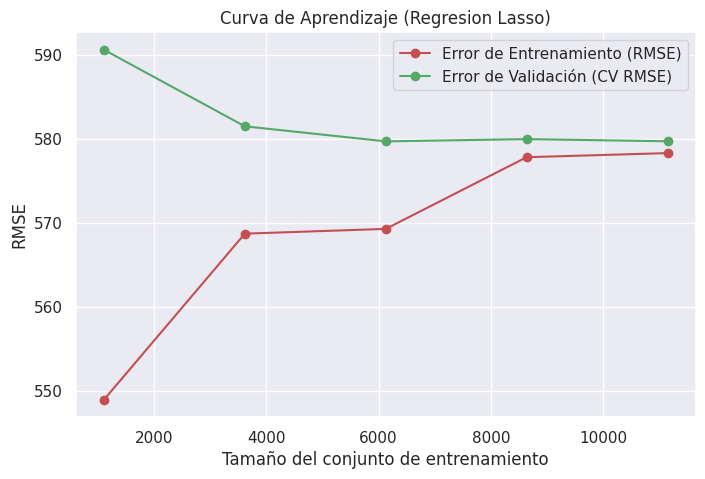

In [75]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    lasso_reg, X_train_prep, y_train_reg, cv=5, scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=SEED)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Error de Entrenamiento (RMSE)")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Error de Validación (CV RMSE)")
plt.title("Curva de Aprendizaje (Regresion Lasso)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.grid(True)
plt.show()

La curva muestra que el error de validación converge cerca del error de entrenamiento a medida que añadimos datos, lo que indica un buen ajuste sin overfitting severo.

##Manejo de Multicolinealidad (Lineal vs. Lasso)
Al comparar ambos modelos de regresión, observamos que tienen un rendimiento predictivo casi idéntico (RMSE de ~583.8 en Lineal vs. ~588.7 en Lasso). Sin embargo, la Regresión Lineal clásica sufre de inestabilidad debido a la alta correlación entre la temperatura real (t1) y la sensación térmica (t2), asignando coeficientes opuestos y exagerados (434.03 y -222.46 respectivamente). La Regresión Lasso resolvió este problema de manera efectiva, aplicando su penalización L1 para reducir el coeficiente de t2 exactamente a 0.0, dejando solo t1 (225.56) como predictor relevante. Esto nos entrega un modelo más simple, robusto y fácil de interpretar sin sacrificar poder predictivo.

In [76]:
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

# Re-instantiate and fit the model to define y_pred_proba and y_pred_clf within this cell's scope
# Assuming X_train_prep, y_train_clf, X_test_prep, y_test_clf, SEED are available from previous cells.
log_clf = LogisticRegression(max_iter=1000, random_state=SEED, class_weight='balanced')
log_clf.fit(X_train_prep, y_train_clf)
y_pred_clf = log_clf.predict(X_test_prep)
y_pred_proba = log_clf.predict_proba(X_test_prep)[:, 1]

#Calculo ROC-AUC
roc_auc = roc_auc_score(y_test_clf, y_pred_proba)
#Calculo F1-Score con el umbral por defecto (0.5)
f1_default = f1_score(y_test_clf, y_pred_clf)

print(f"ROC-AUC: {roc_auc:.3f}")
print(f"F1-Score (Umbral 0.5): {f1_default:.3f}")

ROC-AUC: 0.964
F1-Score (Umbral 0.5): 0.670


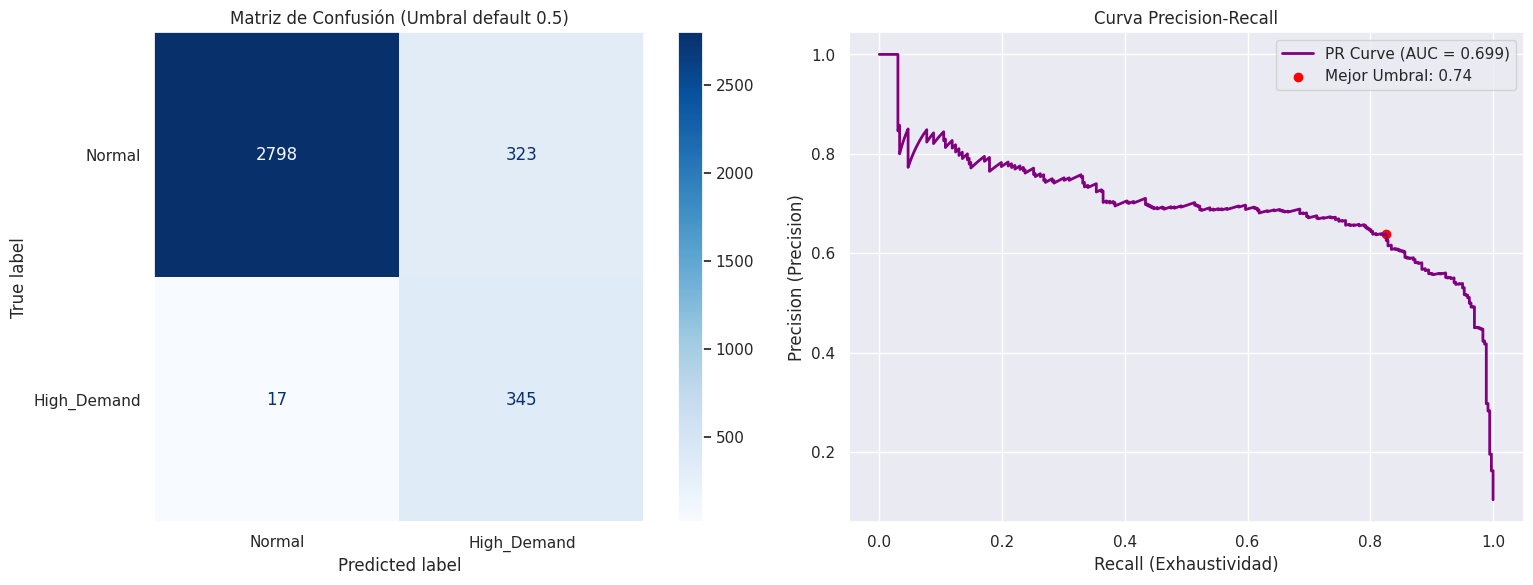

Mejor umbral recomendado basado en F1-Score maximo: 0.74


In [77]:
#MODELADO DE CLASIFICACIÓN (High_Demand)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc

log_clf = LogisticRegression(max_iter=1000, random_state=SEED, class_weight='balanced')
log_clf.fit(X_train_prep, y_train_clf)

#Predicciones
y_pred_clf = log_clf.predict(X_test_prep)
y_pred_proba = log_clf.predict_proba(X_test_prep)[:, 1]

#Matriz de Confusión
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

cm = confusion_matrix(y_test_clf, y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'High_Demand'])
disp.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Matriz de Confusión (Umbral default 0.5)')
axes[0].grid(False)

#Curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test_clf, y_pred_proba)
pr_auc = auc(recall, precision)

axes[1].plot(recall, precision, color='purple', lw=2, label=f'PR Curve (AUC = {pr_auc:.3f})')
axes[1].set_xlabel('Recall (Exhaustividad)')
axes[1].set_ylabel('Precision (Precision)')
axes[1].set_title('Curva Precision-Recall')
axes[1].legend(loc="lower left")

fscore = (2 * precision * recall) / (precision + recall + 1e-8)
ix = np.argmax(fscore)
axes[1].scatter(recall[ix], precision[ix], marker='o', color='red', label=f'Mejor Umbral: {thresholds[ix]:.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Mejor umbral recomendado basado en F1-Score maximo: {thresholds[ix]:.2f}")

In [78]:
print("Proporcion de la clase objetivo (High_Demand):")
print(df_bikes['High_Demand'].value_counts(normalize=True) * 100)

Proporcion de la clase objetivo (High_Demand):
High_Demand
0    90.002297
1     9.997703
Name: proportion, dtype: float64


##Rendimiento del Modelo de Clasificacion
El modelo de Regresión Logística (entrenado con pesos balanceados) demuestra ser muy sensible para detectar los picos de demanda. Al observar la matriz de confusión con el umbral por defecto (0.5), el modelo prioriza fuertemente el Recall (Exhaustividad), logrando detectar casi todos los eventos de alta demanda reales (345 aciertos frente a solo 17 falsos negativos). Sin embargo, esto tiene el costo de generar una cantidad considerable de falsas alarmas (323 falsos positivos). El Área bajo la Curva Precision-Recall (PR AUC) resultó en un sólido 0.699, lo que indica que el modelo tiene buena capacidad de discriminación para este problema desbalanceado.

##Justificación del Umbral High_Demand
Se definió el umbral en el percentil 90 de la variable cnt porque la distribución de la demanda (comprobada en el histograma) presenta una fuerte asimetría positiva. Esto significa que la red opera la mayor parte del tiempo bajo condiciones estables y moderadas. Definir el percentil 90 aísla de forma efectiva ese 10% de eventos "extremos" o "picos de saturación" del sistema, permitiendo a los planificadores urbanos focalizar sus estrategias de redistribución de bicicletas solo cuando el sistema corre riesgo de quedarse sin inventario.